# 以下是一个最简单的模型，展示上升沿检测

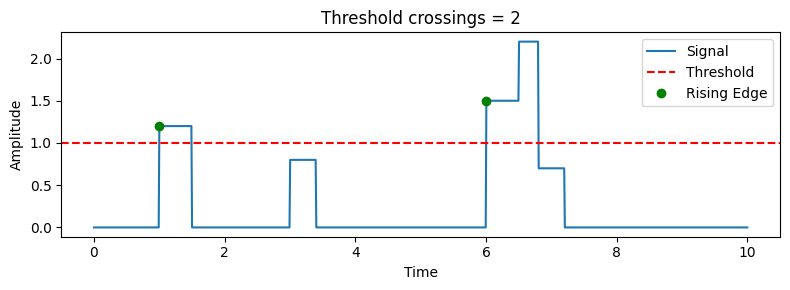

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def count_crossings(sig, thr, eps=1e-12):
    """计算信号从 <thr 到 >=thr 的上升沿个数（事件数）"""
    above = sig >= (thr + eps)
    rise = above & np.roll(~above, 1)
    rise[0] = False
    return int(rise.sum()), rise

# --------------------------
# 1. 生成一个简单的波形
t = np.linspace(0, 10, 1000)          # 时间轴
sig = np.zeros_like(t)

# 模拟几个脉冲
sig[100:150] += 1.2      # 第1个脉冲
sig[300:340] += 0.8      # 第2个脉冲
sig[600:680] += 1.5      # 第3个脉冲
sig[650:720] += 0.7      # 第4个脉冲，与第3个重叠 → pile-up

thr = 1.0                 # 阈值

# 2. 调用 count_crossings
count, rise_mask = count_crossings(sig, thr)

# 3. 可视化
plt.figure(figsize=(8, 3))
plt.plot(t, sig, label='Signal')
plt.axhline(thr, color='r', linestyle='--', label='Threshold')
plt.plot(t[rise_mask], sig[rise_mask], 'go', label='Rising Edge')  # 标记上升沿

plt.title(f"Threshold crossings = {count}")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()


# 以下展示了如何利用cdf获得能谱

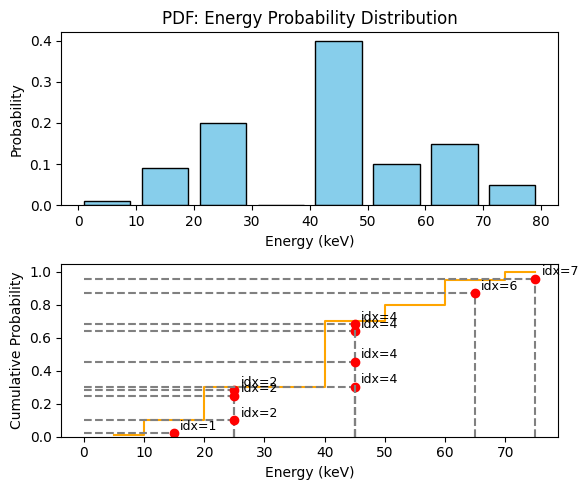

随机数 u: [0.28591374 0.24918495 0.64226044 0.30297181 0.86916116 0.9592486
 0.68396529 0.10181342 0.02117741 0.45463296]
cdf: [0.01 0.1  0.3  0.3  0.7  0.8  0.95 1.  ]
对应索引 idx: [2 2 4 4 6 7 4 2 1 4]
对应能量 bin centers: [25. 25. 45. 45. 65. 75. 45. 25. 15. 45.]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ==== 假设的能量 bins 与对应概率 ====
bins = np.array([0,   10,   20,  30, 40,  50,    60,   70, 80])  # keV
pdf = np.array([0.01, 0.09, 0.2, 0,  0.4, 0.1, 0.15, 0.05])  # 每个区间的相对概率

# 归一化
pdf = pdf / pdf.sum()

# 计算累积分布函数（CDF）
cdf = np.cumsum(pdf)
bin_centers = (bins[:-1] + bins[1:]) / 2

# ==== 画图 ====
fig, ax = plt.subplots(2, 1, figsize=(6, 5))

# 上图：PDF（概率密度）
ax[0].bar(bin_centers, pdf, width=8, color='skyblue', edgecolor='k')
ax[0].set_title('PDF: Energy Probability Distribution')
ax[0].set_xlabel('Energy (keV)')
ax[0].set_ylabel('Probability')

# 下图：CDF（累积分布函数）
ax[1].step(bin_centers, cdf, where='mid', color='orange', label='CDF')
ax[1].set_xlabel('Energy (keV)')
ax[1].set_ylabel('Cumulative Probability')
ax[1].set_ylim(0, 1.05)

# 示意几个随机数 u
# u = np.array([0.05, 0.75, 0.25, 0.55, 0.85])
u = np.random.rand(10)
idx = np.searchsorted(cdf, u)

# 在CDF图上画出这些随机数与对应能量区间
for ui, i in zip(u, idx):
    ax[1].hlines(ui, 0, bin_centers[i], color='gray', linestyle='--')
    ax[1].vlines(bin_centers[i], 0, ui, color='gray', linestyle='--')
    ax[1].plot(bin_centers[i], ui, 'ro')
    ax[1].text(bin_centers[i]+1, ui+0.02, f'idx={i}', fontsize=9)

plt.tight_layout()
plt.show()

print("随机数 u:", u)
print("cdf:", cdf)
print("对应索引 idx:", idx)
print("对应能量 bin centers:", bin_centers[idx])
